<a href="https://colab.research.google.com/github/giuseppemartino26/Semantic-SAM/blob/main/Evaluation_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
import json
import os
from statistics import mean
from itertools import chain
import numpy as np

# Inizializza una lista per memorizzare le medie di "iou_sem" per tutti gli oggetti
iou_sem_list = []
iou_sem_sam_list = []
dice_sem_list = []
dice_sem_sam_list = []

path_folder = '/content/drive/MyDrive/ProgettoSEAI/metriche'
for nome_file in os.listdir(path_folder):

  # Leggi il file JSON
  with open(path_folder + '/' +nome_file, 'r') as f:
      data = json.load(f)

  # Itera su ogni oggetto nel dizionario
  for key in data:
      object_data = data[key]

      # Estrai i valori di "iou_sem" per l'oggetto corrente
      iou_sem_value = [d['iou_sem'] for d in object_data if 'iou_sem' in d]
      iou_sem_sam_value = [d['iou_sem_sam'] for d in object_data if 'iou_sem_sam' in d]
      dice_sem_value = [d['dice_sem'] for d in object_data if 'dice_sem' in d]
      dice_sem_sam_value = [d['dice_sem_sam'] for d in object_data if 'dice_sem_sam' in d]

      # Aggiungi il valore alla lista
      iou_sem_list.append(iou_sem_value)
      iou_sem_sam_list.append(iou_sem_sam_value)
      dice_sem_list.append(dice_sem_value)
      dice_sem_sam_list.append(dice_sem_sam_value)


#converto le liste in numpy array
iou_sem_list = np.array(iou_sem_list).flatten()
iou_sem_sam_list = np.array(iou_sem_sam_list).flatten()
dice_sem_list = np.array(dice_sem_list).flatten()
dice_sem_sam_list = np.array(dice_sem_sam_list).flatten()

iou_sem_mean = np.mean(iou_sem_list)
iou_sem_sam_mean = np.mean(iou_sem_sam_list)
dice_sem_mean = np.mean(dice_sem_list)
dice_sem_sam_mean = np.mean(dice_sem_sam_list)

print(f"IOU media - segmentazione semantica: {iou_sem_mean}")
print(f"IOU media - semantic SAM: {iou_sem_sam_mean}")
print(f"DICE media - segmentazione semantica: {dice_sem_mean}")
print(f"DICE media - semantic SAM: {dice_sem_sam_mean}")


IOU media - segmentazione semantica: 0.6169103343675132
IOU media - semantic SAM: 0.6423473409029508
DICE media - segmentazione semantica: 0.7202627816072573
DICE media - semantic SAM: 0.7355537670943226


In [20]:
print(f"Numero di immagini considerate per la media: {len(iou_sem_list)}")

Numero di immagini considerate per la media: 894


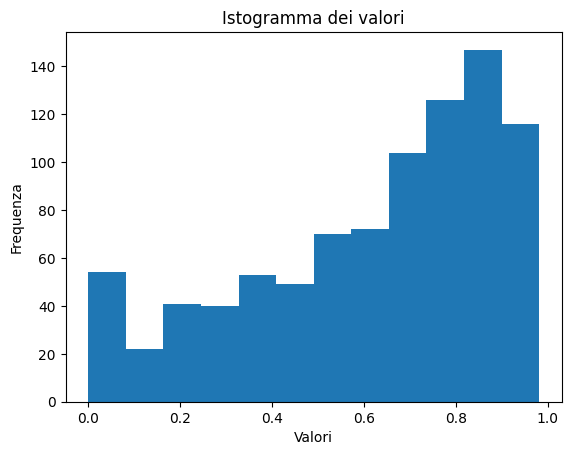

In [21]:
import matplotlib.pyplot as plt

plt.hist(iou_sem_list, bins='auto')
plt.xlabel('IOU values')
plt.ylabel('Frequencies')
plt.title('Semantic segmentation')
plt.show()

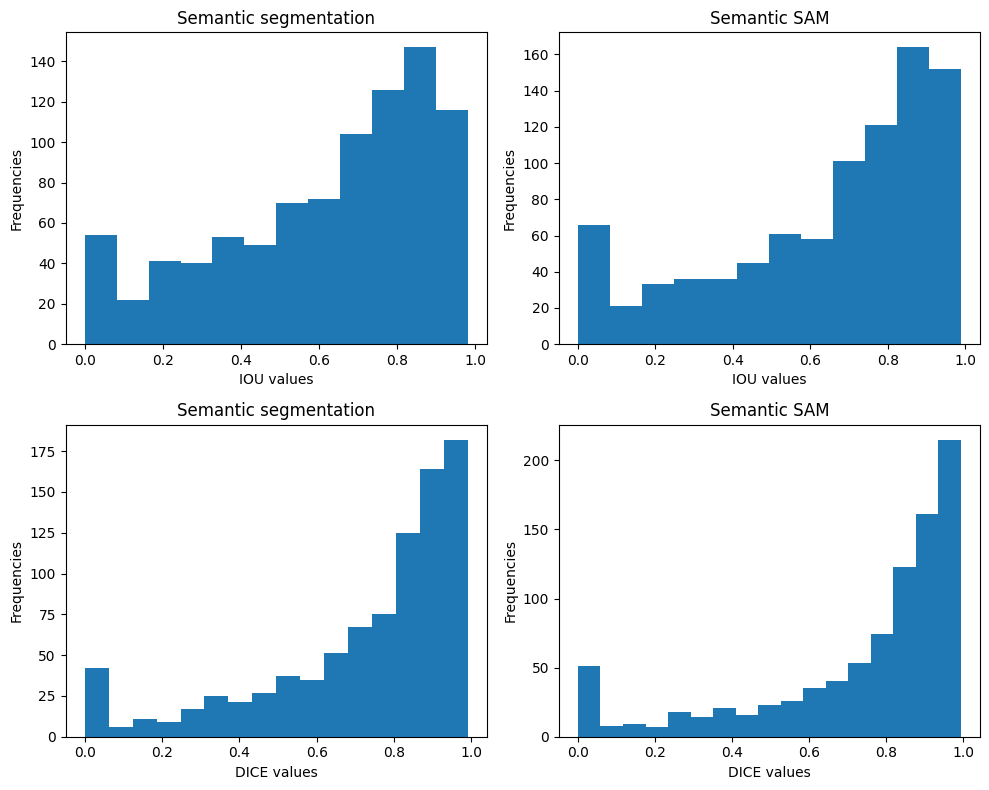

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Creazione dei sottoplot
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot 1
axs[0, 0].hist(iou_sem_list, bins='auto')
axs[0, 0].set_title('Semantic segmentation')
axs[0, 0].set_xlabel('IOU values')
axs[0, 0].set_ylabel('Frequencies')

# Plot 2
axs[0, 1].hist(iou_sem_sam_list, bins='auto')
axs[0, 1].set_title('Semantic SAM')
axs[0, 1].set_xlabel('IOU values')
axs[0, 1].set_ylabel('Frequencies')

# Plot 3
axs[1, 0].hist(dice_sem_list, bins='auto')
axs[1, 0].set_title('Semantic segmentation')
axs[1, 0].set_xlabel('DICE values')
axs[1, 0].set_ylabel('Frequencies')

# Plot 4
axs[1, 1].hist(dice_sem_sam_list, bins='auto')
axs[1, 1].set_title('Semantic SAM')
axs[1, 1].set_xlabel('DICE values')
axs[1, 1].set_ylabel('Frequencies')


# Spaziatura tra i sottoplot
plt.tight_layout()

# Visualizzazione del grafico
plt.show()
